## Bengali Female & Male names classification

#### lets import the required libs

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
print(tf.__version__)

2.4.1


In [4]:
data_path = '/content/drive/MyDrive/Colab Notebooks/bengali-female-vs-male-names_v1.csv'

In [5]:
import csv

names = []
labels = []
total = 0

#### read the data and separate the names and labels

In [6]:
x_male = []
x_female = []
y_male = []
y_female = []

In [7]:
with open(data_path, 'r') as fp:
    data = csv.reader(fp, delimiter=',')
    next(data)
    
    for row in data:
      # print(int(row[1]) == 0)
      # break
      if int(row[1]) == 0:
        x_male.append(row[0])
        y_male.append(int(row[1]))
      else:
        x_female.append(row[0])
        y_female.append(int(row[1]))
      total += 1

In [8]:
print(f"Total data found: {total}")
print(f"Total male datapoint: {len(x_male)}")
print(f"Total female datapoint: {len(x_female)}")

Total data found: 2030
Total male datapoint: 1029
Total female datapoint: 1001


In [9]:
train_split = 0.9

In [10]:
male_train_split = int(len(x_male) * train_split)
female_train_split = int(len(x_female) * train_split)

In [11]:
x_train = []
y_train = []
x_test = []
y_test = []

In [12]:
x_train.extend(x_male[:male_train_split])
x_train.extend(x_female[:female_train_split])

y_train.extend(y_male[:male_train_split])
y_train.extend(y_female[:female_train_split])

x_test.extend(x_male[male_train_split:])
x_test.extend(x_female[female_train_split:])

y_test.extend(y_male[male_train_split:])
y_test.extend(y_female[female_train_split:])

In [13]:
print(f"Total train data: {len(x_train)}")
print(f"Total test data: {len(x_test)}")

Total train data: 1826
Total test data: 204


In [14]:
char_to_idx = {}
idx_to_char = {}

In [15]:
idx = 1

#### creating char to idx mapping and converting string to sequences

In [18]:
def prepare_sequences(names):
  global idx
  sequences = []
  for name in names:
      seq = []
      for ch in name:
          if ch not in char_to_idx:
              char_to_idx[ch] = idx
              idx_to_char[idx] = ch
              seq.append(idx)
              idx += 1
          else:
              seq.append(char_to_idx[ch])
      sequences.append(seq)
  return sequences

In [19]:
x_train_seq = prepare_sequences(x_train)
x_test_seq = prepare_sequences(x_test)

In [20]:
print(f"Total train seq: {len(x_train_seq)}")
print(f"TOtal test seq: {len(x_test_seq)}")

Total train seq: 1826
TOtal test seq: 204


In [21]:
print(x_train_seq[0])
print(x_test_seq[0])

[1, 2, 3, 4, 5, 6, 7, 1, 8, 9, 10]
[20, 8, 6, 21, 10, 5, 15, 31, 23, 8, 17]


In [22]:
max_length = max([len(seq) for seq in x_train_seq])
padding_type = 'post'
trunc_type = 'post'

In [23]:
max_length

29

In [24]:
x_train_padded = pad_sequences(x_train_seq, padding=padding_type, truncating=trunc_type, maxlen=max_length)
x_test_padded = pad_sequences(x_test_seq, padding=padding_type, truncating=trunc_type, maxlen=max_length)

In [25]:
x_train_padded[:10]

array([[ 1,  2,  3,  4,  5,  6,  7,  1,  8,  9, 10,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [11,  8, 10, 12, 13,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 4,  8, 14,  8, 14,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [15, 16,  2,  8, 17,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [15, 17, 18, 19,  5,  4,  8, 13,  8, 14,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [20,  6, 21, 22,  3, 14,  5,  4,  6, 18, 17,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [13, 12,  6, 12, 22, 18,  5,  6,  8,  1,  8, 10,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [17,  8, 11, 21,  2,  5, 10,  8, 22, 18, 13,  0,  0,  0,  0,  

In [26]:
train_x = np.array(x_train_padded)
train_y = np.array(y_train)

test_x = np.array(x_test_padded)
test_y = np.array(y_test)

In [27]:
train_sp_idx = int(len(train_x) * train_split)

print(train_sp_idx)

val_x = train_x[train_sp_idx:]
train_x = train_x[:train_sp_idx]

val_y = train_y[train_sp_idx:]
train_y = train_y[:train_sp_idx]


1643


In [28]:
print(len(train_x), len(val_x), len(test_x))
print(len(train_y), len(val_y), len(test_y))

1643 183 204
1643 183 204


In [29]:
vocab_size = len(char_to_idx) + 1 # plus 1 for out of vocabulary char
embedding_dim = 64

In [30]:
vocab_size

63

#### LSTM based Model

In [31]:
model_1 = tf.keras.Sequential([
      tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
      tf.keras.layers.LSTM(64),
      tf.keras.layers.Dense(256, activation='relu'),
      tf.keras.layers.Dropout(0.4),
      tf.keras.layers.Dense(1, activation='sigmoid')
])

In [32]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 29, 64)            4032      
_________________________________________________________________
lstm (LSTM)                  (None, 64)                33024     
_________________________________________________________________
dense (Dense)                (None, 256)               16640     
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 53,953
Trainable params: 53,953
Non-trainable params: 0
_________________________________________________________________


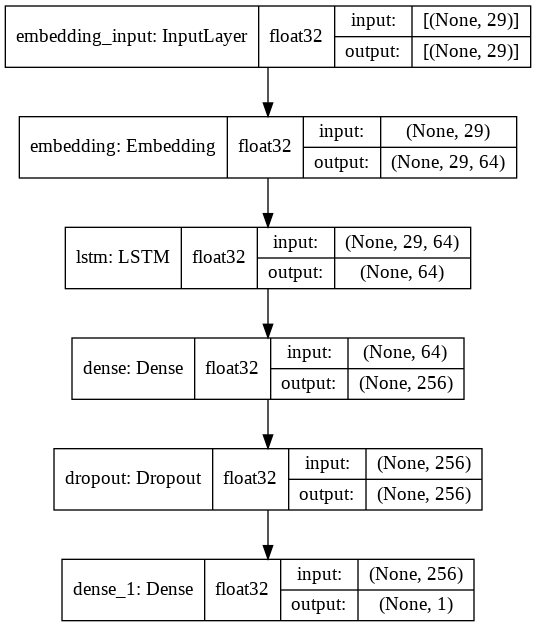

In [33]:
tf.keras.utils.plot_model(model_1, 'model_1.png', show_shapes=True, show_dtype=True)

In [34]:
model_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [35]:
lr_callback = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=2, mode='auto')
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint('/content/models/model.{epoch:02d}-{val_loss:.2f}.h5', monitor='val_loss', save_best_only=True)

In [36]:
hist_1 = model_1.fit(train_x, train_y, epochs=100, validation_data=(val_x, val_y), batch_size = 32, verbose=1, shuffle=True, callbacks=[lr_callback, checkpoint_callback])

Epoch 1/100
52/52 [==============================] - 9s 16ms/step - loss: 0.6884 - accuracy: 0.5547 - val_loss: 0.6737 - val_accuracy: 0.7978
Epoch 2/100
52/52 [==============================] - 0s 6ms/step - loss: 0.6317 - accuracy: 0.6464 - val_loss: 0.7341 - val_accuracy: 0.8087
Epoch 3/100
52/52 [==============================] - 0s 6ms/step - loss: 0.5319 - accuracy: 0.6986 - val_loss: 0.4629 - val_accuracy: 0.9945
Epoch 4/100
52/52 [==============================] - 0s 6ms/step - loss: 0.5269 - accuracy: 0.7133 - val_loss: 0.4981 - val_accuracy: 0.9672
Epoch 5/100
52/52 [==============================] - 0s 6ms/step - loss: 0.5147 - accuracy: 0.7206 - val_loss: 0.4556 - val_accuracy: 0.9508
Epoch 6/100
52/52 [==============================] - 0s 6ms/step - loss: 0.4861 - accuracy: 0.7219 - val_loss: 0.5196 - val_accuracy: 0.8852
Epoch 7/100
52/52 [==============================] - 0s 8ms/step - loss: 0.4402 - accuracy: 0.7834 - val_loss: 0.4117 - val_accuracy: 0.8525
Epoch 8/100


In [ ]:
model_1.evaluate(test_x, test_y)

7/7 [==============================] - 0s 3ms/step - loss: 0.4332 - accuracy: 0.7843


[0.43316519260406494, 0.7843137383460999]

In [ ]:
def plot_graph(history, string, model_id, title):
    plt.plot(history.history[string], 'b-o', label=string)
    plt.plot(history.history['val_' + string], 'r-o', label='val_' + string)
    plt.xlabel(string + ' vs val ' + string)
    plt.legend()
    plt.title(title)
    plt.savefig('learning_curve_' + string + '_' + model_id + '.png')
    plt.show()

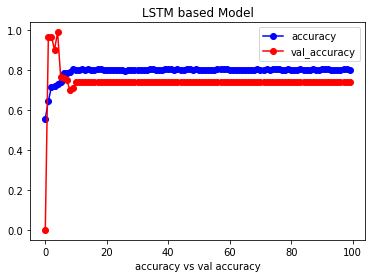

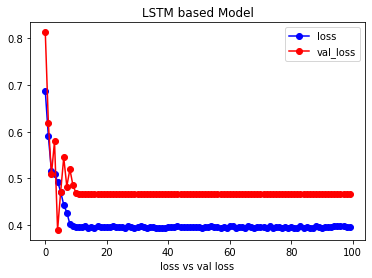

In [ ]:
plot_graph(hist_1, 'accuracy', '1', 'LSTM based Model')
plot_graph(hist_1, 'loss', '1', 'LSTM based Model')

#### Bidirectional LSTM based Model

In [ ]:
model_2 = tf.keras.Sequential([
      tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
      tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dropout(0.4),
      tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model_2.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_14 (Embedding)     (None, 29, 64)            4032      
_________________________________________________________________
bidirectional_8 (Bidirection (None, 64)                24832     
_________________________________________________________________
dense_34 (Dense)             (None, 128)               8320      
_________________________________________________________________
dropout_14 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 129       
Total params: 37,313
Trainable params: 37,313
Non-trainable params: 0
_________________________________________________________________


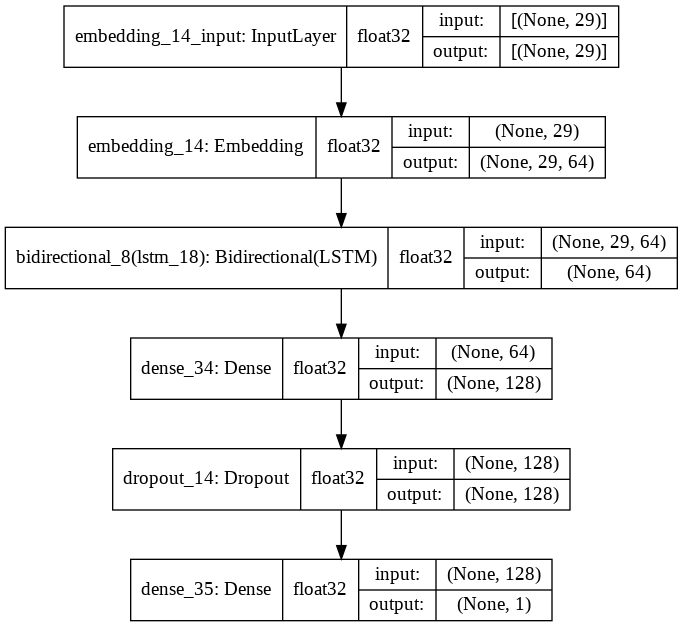

In [ ]:
tf.keras.utils.plot_model(model_2, 'model_2.png', show_shapes=True, show_dtype=True)

In [ ]:
model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
lr_callback = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=2, mode='auto')
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint('/content/models/model.{epoch:02d}-{val_loss:.2f}.h5', monitor='val_loss', save_best_only=True)

In [ ]:
hist_2 = model_2.fit(train_x, train_y, epochs=100, validation_data=(val_x, val_y), batch_size = 32, verbose=1, shuffle=True, callbacks=[lr_callback, checkpoint_callback])

Epoch 1/100
52/52 [==============================] - 4s 19ms/step - loss: 0.6821 - accuracy: 0.5332 - val_loss: 0.4908 - val_accuracy: 0.8689
Epoch 2/100
52/52 [==============================] - 0s 8ms/step - loss: 0.5359 - accuracy: 0.7018 - val_loss: 0.3170 - val_accuracy: 0.9344
Epoch 3/100
52/52 [==============================] - 0s 8ms/step - loss: 0.4472 - accuracy: 0.7730 - val_loss: 0.5071 - val_accuracy: 0.7760
Epoch 4/100
52/52 [==============================] - 0s 8ms/step - loss: 0.3885 - accuracy: 0.8156 - val_loss: 0.5175 - val_accuracy: 0.7541
Epoch 5/100
52/52 [==============================] - 0s 8ms/step - loss: 0.3544 - accuracy: 0.8472 - val_loss: 0.4466 - val_accuracy: 0.7814
Epoch 6/100
52/52 [==============================] - 0s 8ms/step - loss: 0.3754 - accuracy: 0.8466 - val_loss: 0.4391 - val_accuracy: 0.7869
Epoch 7/100
52/52 [==============================] - 0s 7ms/step - loss: 0.3438 - accuracy: 0.8612 - val_loss: 0.4255 - val_accuracy: 0.7978
Epoch 8/100


In [ ]:
model_2.evaluate(test_x, test_y)

7/7 [==============================] - 0s 4ms/step - loss: 0.3969 - accuracy: 0.8137


[0.3969030976295471, 0.813725471496582]

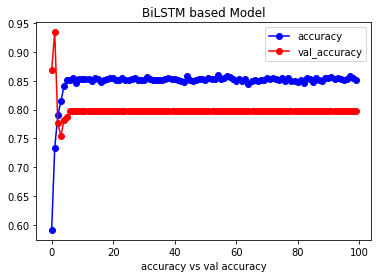

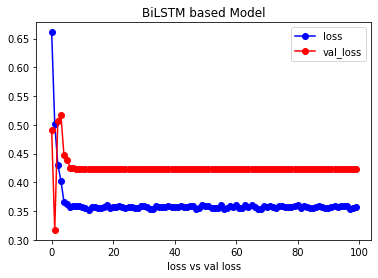

In [ ]:
plot_graph(hist_2, 'accuracy', '2', 'BiLSTM based Model')
plot_graph(hist_2, 'loss', '2', 'BiLSTM based Model')

#### Conv1D based Model

In [ ]:
model_3 = tf.keras.Sequential([
      tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
      tf.keras.layers.Conv1D(filters=32, kernel_size=2, padding='valid', activation='relu'),
      tf.keras.layers.MaxPooling1D(),
      tf.keras.layers.Conv1D(filters=32, kernel_size=3, padding='valid', activation='relu'),
      tf.keras.layers.MaxPooling1D(),
      tf.keras.layers.Conv1D(filters=32, kernel_size=4, padding='valid', activation='relu'),
      tf.keras.layers.GlobalMaxPool1D(),
      tf.keras.layers.Dense(256, activation='relu'),
      tf.keras.layers.Dropout(0.5),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model_3.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_15 (Embedding)     (None, 29, 64)            4032      
_________________________________________________________________
conv1d_12 (Conv1D)           (None, 28, 32)            4128      
_________________________________________________________________
max_pooling1d_8 (MaxPooling1 (None, 14, 32)            0         
_________________________________________________________________
conv1d_13 (Conv1D)           (None, 12, 32)            3104      
_________________________________________________________________
max_pooling1d_9 (MaxPooling1 (None, 6, 32)             0         
_________________________________________________________________
conv1d_14 (Conv1D)           (None, 3, 32)             4128      
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 32)              

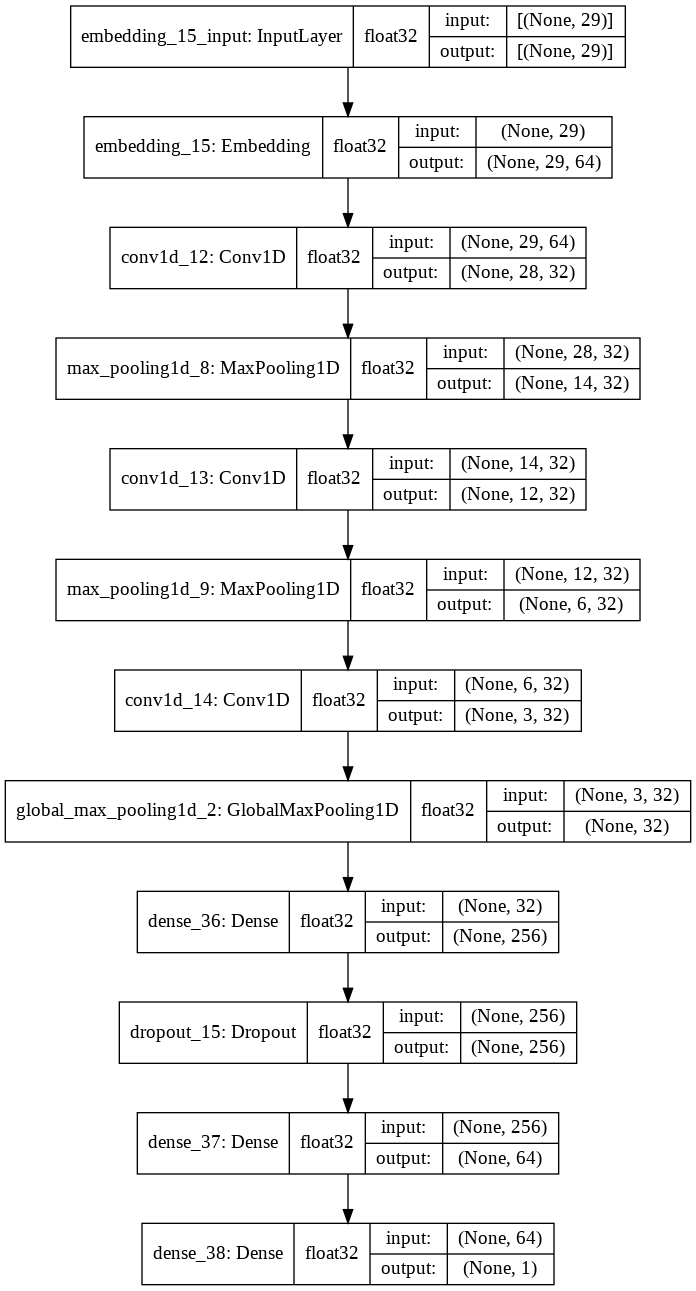

In [ ]:
tf.keras.utils.plot_model(model_3, 'model_3.png', show_shapes=True, show_dtype=True)

In [ ]:
model_3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
lr_callback = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=2, mode='auto')
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint('/content/models/model.{epoch:02d}-{val_loss:.2f}.h5', monitor='val_loss', save_best_only=True)

In [ ]:
hist_3 = model_3.fit(train_x, train_y, epochs=100, validation_data=(val_x, val_y), batch_size = 32, verbose=1, shuffle=True, callbacks=[lr_callback, checkpoint_callback])

Epoch 1/100
52/52 [==============================] - 1s 8ms/step - loss: 0.6722 - accuracy: 0.5409 - val_loss: 0.6395 - val_accuracy: 0.8579
Epoch 2/100
52/52 [==============================] - 0s 5ms/step - loss: 0.4610 - accuracy: 0.7647 - val_loss: 0.3384 - val_accuracy: 0.8634
Epoch 3/100
52/52 [==============================] - 0s 5ms/step - loss: 0.2329 - accuracy: 0.9072 - val_loss: 0.2126 - val_accuracy: 0.9180
Epoch 4/100
52/52 [==============================] - 0s 5ms/step - loss: 0.1548 - accuracy: 0.9451 - val_loss: 0.2368 - val_accuracy: 0.9071
Epoch 5/100
52/52 [==============================] - 0s 5ms/step - loss: 0.1448 - accuracy: 0.9435 - val_loss: 0.1688 - val_accuracy: 0.9344
Epoch 6/100
52/52 [==============================] - 0s 5ms/step - loss: 0.1181 - accuracy: 0.9613 - val_loss: 0.1294 - val_accuracy: 0.9563
Epoch 7/100
52/52 [==============================] - 0s 5ms/step - loss: 0.1233 - accuracy: 0.9564 - val_loss: 0.1469 - val_accuracy: 0.9399
Epoch 8/100
5

In [ ]:
model_3.evaluate(test_x, test_y)

7/7 [==============================] - 0s 2ms/step - loss: 0.2588 - accuracy: 0.8971


[0.2588161528110504, 0.8970588445663452]

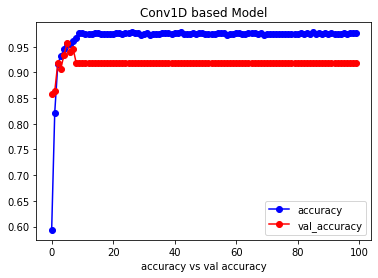

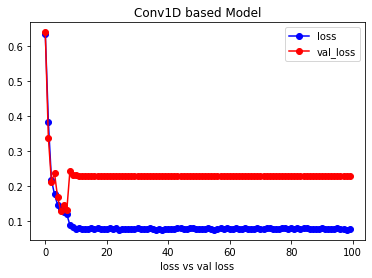

In [ ]:
plot_graph(hist_3, 'accuracy', '3', 'Conv1D based Model')
plot_graph(hist_3, 'loss', '3', 'Conv1D based Model')

#### Stacked LSTM based Model

In [ ]:
model_4 = tf.keras.Sequential([
      tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
      tf.keras.layers.LSTM(32, return_sequences=True),
      tf.keras.layers.LSTM(64),
      tf.keras.layers.Dense(256, activation='relu'),
      tf.keras.layers.Dropout(0.5),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model_4.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_16 (Embedding)     (None, 29, 64)            4032      
_________________________________________________________________
lstm_19 (LSTM)               (None, 29, 32)            12416     
_________________________________________________________________
lstm_20 (LSTM)               (None, 64)                24832     
_________________________________________________________________
dense_39 (Dense)             (None, 256)               16640     
_________________________________________________________________
dropout_16 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_40 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_41 (Dense)             (None, 1)               

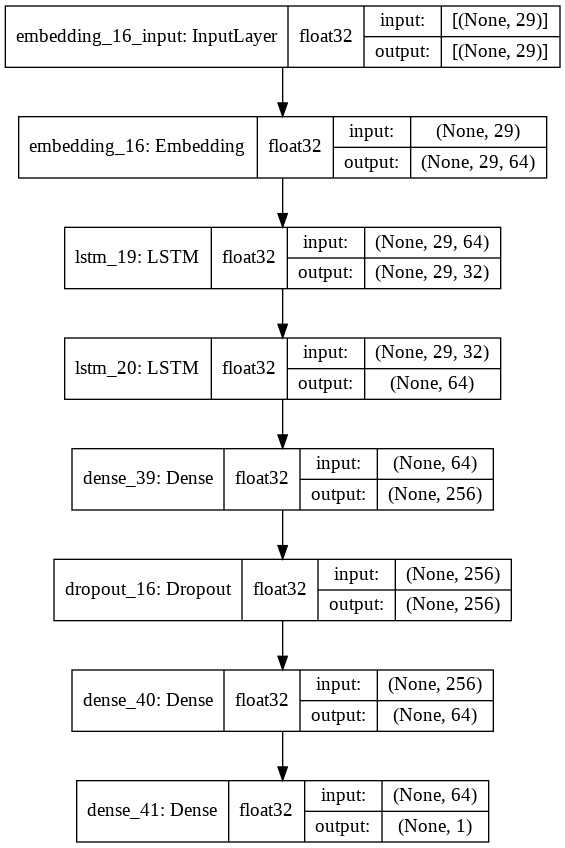

In [ ]:
tf.keras.utils.plot_model(model_4, 'model_4.png', show_shapes=True, show_dtype=True)

In [ ]:
model_4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
lr_callback = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=2, mode='auto')
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint('/content/models/model.{epoch:02d}-{val_loss:.2f}.h5', monitor='val_loss', save_best_only=True)

In [ ]:
hist_4 = model_4.fit(train_x, train_y, epochs=100, validation_data=(val_x, val_y), batch_size = 32, verbose=1, shuffle=True, callbacks=[lr_callback, checkpoint_callback])

Epoch 1/100
52/52 [==============================] - 3s 20ms/step - loss: 0.6851 - accuracy: 0.5441 - val_loss: 0.5620 - val_accuracy: 0.9563
Epoch 2/100
52/52 [==============================] - 0s 8ms/step - loss: 0.5527 - accuracy: 0.6978 - val_loss: 0.4303 - val_accuracy: 0.9672
Epoch 3/100
52/52 [==============================] - 0s 8ms/step - loss: 0.4906 - accuracy: 0.7378 - val_loss: 0.6030 - val_accuracy: 0.8962
Epoch 4/100
52/52 [==============================] - 0s 8ms/step - loss: 0.4961 - accuracy: 0.7308 - val_loss: 0.3398 - val_accuracy: 0.9344
Epoch 5/100
52/52 [==============================] - 0s 8ms/step - loss: 0.4361 - accuracy: 0.7872 - val_loss: 0.2291 - val_accuracy: 0.9290
Epoch 6/100
52/52 [==============================] - 0s 8ms/step - loss: 0.4440 - accuracy: 0.7948 - val_loss: 0.4142 - val_accuracy: 0.8087
Epoch 7/100
52/52 [==============================] - 0s 8ms/step - loss: 0.3858 - accuracy: 0.8184 - val_loss: 0.5776 - val_accuracy: 0.6667
Epoch 8/100


In [ ]:
model_4.evaluate(test_x, test_y)

7/7 [==============================] - 0s 4ms/step - loss: 0.3878 - accuracy: 0.8284


[0.3878200650215149, 0.8284313678741455]

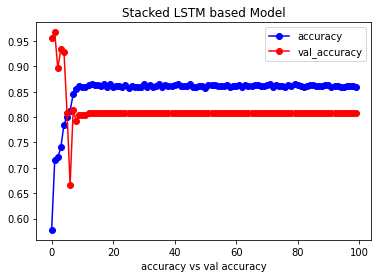

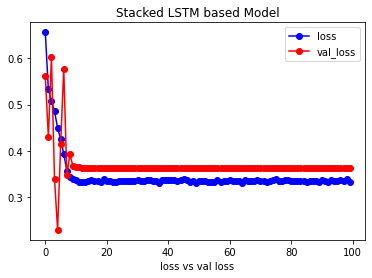

In [ ]:
plot_graph(hist_4, 'accuracy', '4', 'Stacked LSTM based Model')
plot_graph(hist_4, 'loss', '4', 'Stacked LSTM based Model')

#### Conv1D and LSTM based Model

In [ ]:
model_5 = tf.keras.Sequential([
      tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
      tf.keras.layers.Conv1D(filters=16, kernel_size=2, padding='valid', activation='relu'),
      tf.keras.layers.MaxPooling1D(),
      tf.keras.layers.Conv1D(filters=32, kernel_size=3, padding='valid', activation='relu'),
      tf.keras.layers.MaxPooling1D(),
      tf.keras.layers.Conv1D(filters=64, kernel_size=4, padding='valid', activation='relu'),
      tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
      tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
      tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128)),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dropout(0.5),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model_5.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_17 (Embedding)     (None, 29, 64)            4032      
_________________________________________________________________
conv1d_15 (Conv1D)           (None, 28, 16)            2064      
_________________________________________________________________
max_pooling1d_10 (MaxPooling (None, 14, 16)            0         
_________________________________________________________________
conv1d_16 (Conv1D)           (None, 12, 32)            1568      
_________________________________________________________________
max_pooling1d_11 (MaxPooling (None, 6, 32)             0         
_________________________________________________________________
conv1d_17 (Conv1D)           (None, 3, 64)             8256      
_________________________________________________________________
bidirectional_9 (Bidirection (None, 3, 64)           

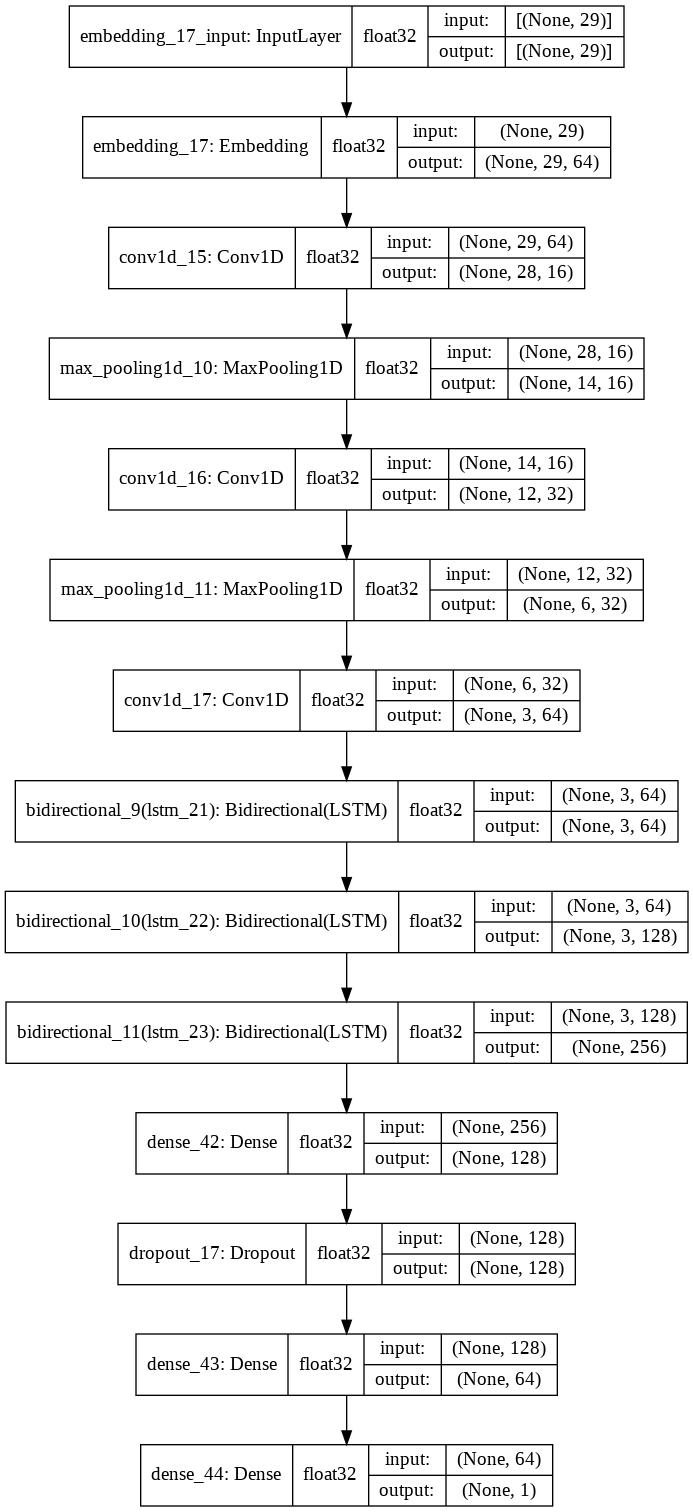

In [ ]:
tf.keras.utils.plot_model(model_5, 'model_5.png', show_shapes=True, show_dtype=True)

In [ ]:
model_5.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
lr_callback = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=2, mode='auto')
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint('/content/models/model.{epoch:02d}-{val_loss:.2f}.h5', monitor='val_loss', save_best_only=True)

In [ ]:
hist_5 = model_5.fit(train_x, train_y, epochs=100, validation_data=(val_x, val_y), batch_size = 32, verbose=1, shuffle=True, callbacks=[lr_callback, checkpoint_callback])

Epoch 1/100
52/52 [==============================] - 9s 48ms/step - loss: 0.6863 - accuracy: 0.5612 - val_loss: 0.7362 - val_accuracy: 0.7322
Epoch 2/100
52/52 [==============================] - 1s 15ms/step - loss: 0.5358 - accuracy: 0.7005 - val_loss: 0.2757 - val_accuracy: 0.9016
Epoch 3/100
52/52 [==============================] - 1s 13ms/step - loss: 0.3019 - accuracy: 0.8854 - val_loss: 0.2996 - val_accuracy: 0.8634
Epoch 4/100
52/52 [==============================] - 1s 12ms/step - loss: 0.2098 - accuracy: 0.9185 - val_loss: 0.1936 - val_accuracy: 0.8907
Epoch 5/100
52/52 [==============================] - 1s 13ms/step - loss: 0.1786 - accuracy: 0.9299 - val_loss: 0.1814 - val_accuracy: 0.9126
Epoch 6/100
52/52 [==============================] - 1s 15ms/step - loss: 0.2093 - accuracy: 0.9200 - val_loss: 0.2020 - val_accuracy: 0.9290
Epoch 7/100
52/52 [==============================] - 1s 15ms/step - loss: 0.1866 - accuracy: 0.9332 - val_loss: 0.1481 - val_accuracy: 0.9290
Epoch 

In [ ]:
model_5.evaluate(test_x, test_y)

7/7 [==============================] - 0s 6ms/step - loss: 0.2507 - accuracy: 0.9216


[0.25066718459129333, 0.9215686321258545]

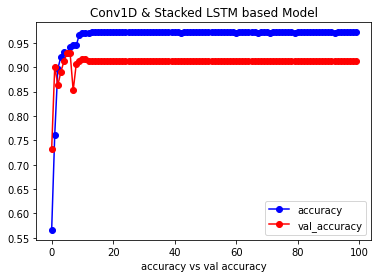

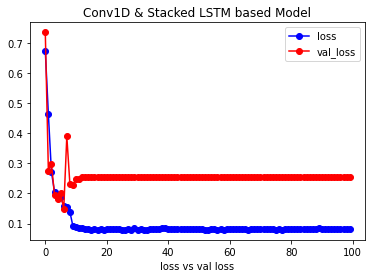

In [ ]:
plot_graph(hist_5, 'accuracy', '5', 'Conv1D & Stacked LSTM based Model')
plot_graph(hist_5, 'loss', '5', 'Conv1D & Stacked LSTM based Model')